In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('mymoviedb.csv',lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [7]:
df['Popularity'].unique()

array([5083.954, 3827.658, 2618.087, ...,   13.356,   13.355,   13.354],
      shape=(8160,))

Exploration summary

1.we have a dataframe consisting of 9827 rows and 9 columns 
2.our data set looks bit tidy with no Nans nor duplicated values.
3.Release dat column needs to be casted into date time and to extract only the year value 
4.Overview,and poster url would notbe so useful during analysis so we will drop here.
5.there is  a noticable outliers in popularity column 
6.Vote_avg better be categorized for proper analysis 
7.genre column has comma seperated values and white spaces thst needs to be handled and casted into category 

# Preprocessing

In [8]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [9]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
# Dropping the columns 
cols = ['Overview','Poster_Url']
df.drop(cols,axis = 1,inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre'],
      dtype='object')

In [12]:
#cateagorizing vote_Average columns 


We cut cut the vote_average values and make 4 categories popular,average ,below_avg, not_popular to describe it more using categorize_col() function provided above


In [13]:
def categorize_col(df,col,labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col]= pd.cut(df[col],edges,labels = labels,duplicates = 'drop')
    return df

In [14]:
labels = ['not_popular','below_avg','average','popular']

categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,en,Thriller
3,2021,Encanto,2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War"


In [16]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [17]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

# we'd split genres into a list and then explode our dataframe to have only genre per row for each movie 


In [18]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


In [19]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [20]:
df.nunique()

Release_Date          100
Title                9415
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                  19
dtype: int64

# Data visualization 

In [21]:
sns.set_style('whitegrid')

# 1. Most frequent genre of the movie released on Netflix


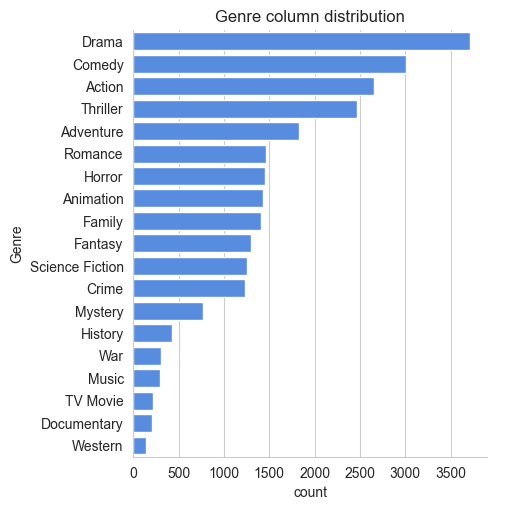

In [22]:
#1. Most frequent genre of the movie released on Netflix
import matplotlib.pyplot as plt

sns.catplot(y = 'Genre',data = df,kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre column distribution')
plt.show()


# 2.which has highest votes in vote avg column ? 

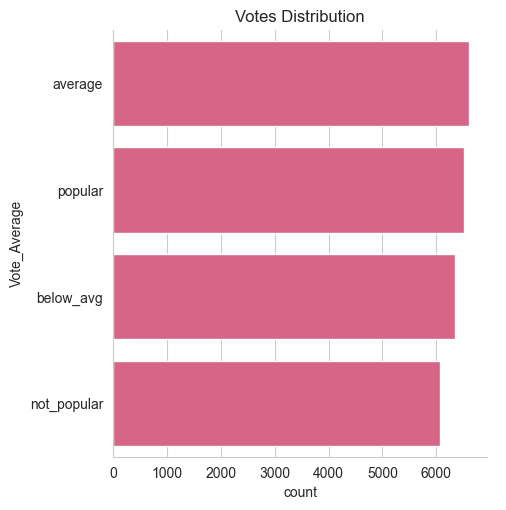

In [23]:
sns.catplot(y = 'Vote_Average',data = df,kind = 'count',
           order = df['Vote_Average'].value_counts().index,color = '#e75480')
plt.title('Votes Distribution')
plt.show()

# 3. What movie got the highest popularity? what it's Genre ?

In [24]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction


# 4.what movie got thre lowest popularity ? what it's genre ?

In [25]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,en,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,en,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,en,History
25549,1984,Threads,13.354,186,popular,en,War
25550,1984,Threads,13.354,186,popular,en,Drama
25551,1984,Threads,13.354,186,popular,en,Science Fiction


# 5.which year has highest filmmed movies ?

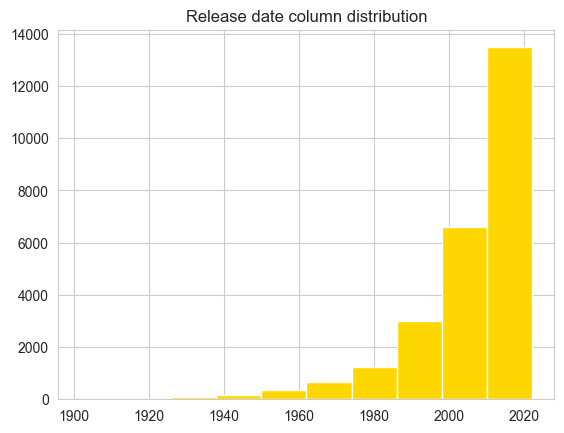

In [26]:
df['Release_Date'].hist(color='#ffd700')  # using a yellow tone
plt.title('Release date column distribution')
plt.show()


# Which language got most populatity ?

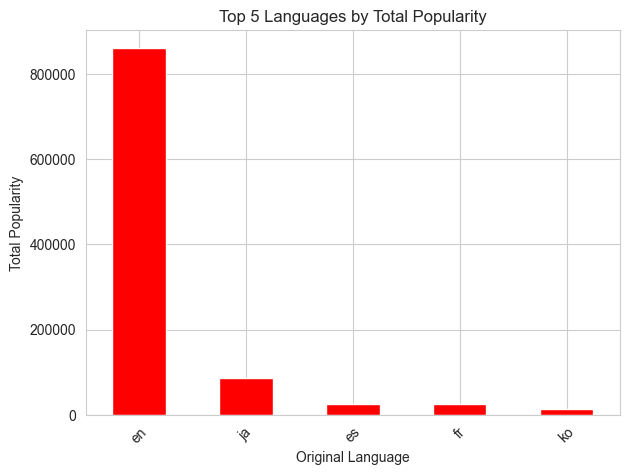

In [34]:
# Group by Original_Language and sum the popularity
language_popularity = df.groupby('Original_Language')['Popularity'].sum().sort_values(ascending=False)

# Show only top 5 languages
top_5_languages = language_popularity.head(5)

# Plot the results
top_5_languages.plot(kind='bar', color='red')
plt.title('Top 5 Languages by Total Popularity')
plt.xlabel('Original Language')
plt.ylabel('Total Popularity')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
